In [67]:
# Laoding Basic data analysis libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [68]:
# Basic programming and data visualization libraries
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [69]:
def hist_perc(df_col,bin_size,rng_st,rng_end):
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
    #plt.hist(x = train_df.RevolvingUtilizationOfUnsecuredLines,bins=10,range=(,1))
    plt.hist(x = df_col,bins=bin_size,range=(rng_st,rng_end))
    formatter = mticker.FuncFormatter(lambda v, pos: str(round((v*100/train_df.shape[0]),2)))
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.show()



In [70]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        histnorm="",
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=19,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

In [71]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig, filename='overlaid histogram')
    
    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[feature]))
        print("{0} var  : ".format(target), np.var(df[feature]))
        print("{0} skew : ".format(target), skew(df[feature]))
        print("{0} kurt : ".format(target), kurtosis(df[feature]))
        print('-*-'*25)
    
    DescribeFloatSkewKurt(df,feature)

In [72]:
def OutLiersBox(df,nameOfFeature):
    
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")


In [73]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

In [74]:
# Declaration of Varibles
SEED = 7


In [75]:
# IMporting the dataset into memory

np.random.seed(SEED)
train_df = pd.read_csv("cs-training.csv")
test_df = pd.read_csv("cs-test.csv")


In [76]:
train_df = train_df.sample(frac=0.1)

In [77]:
#Drop the serial number column
train_df.drop(train_df[['Unnamed: 0']],axis=1,inplace=True)
test_df.drop(test_df[['Unnamed: 0']],axis=1,inplace=True)

In [78]:
target = train_df['SeriousDlqin2yrs']

In [13]:
#train_df.drop(train_df[['SeriousDlqin2yrs']],axis=1,inplace=True)

In [14]:
test_df.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
5,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
6,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
7,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
8,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
9,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


In [15]:
#Identify NA values

train_df.isna().sum()


SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           3061
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       385
dtype: int64

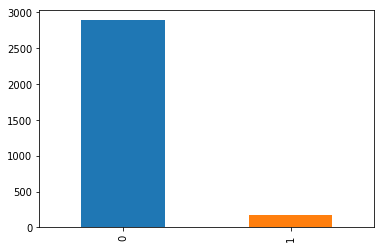

In [16]:
#train_df[(train_df['MonthlyIncome'].isna()) & (train_df['SeriousDlqin2yrs']!=0)]
train_df[(train_df['MonthlyIncome'].isna())].SeriousDlqin2yrs.value_counts().plot.bar()



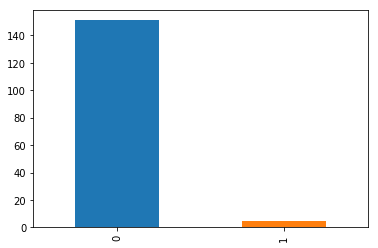

In [17]:
train_df[(train_df['MonthlyIncome']==0)].SeriousDlqin2yrs.value_counts().plot.bar()

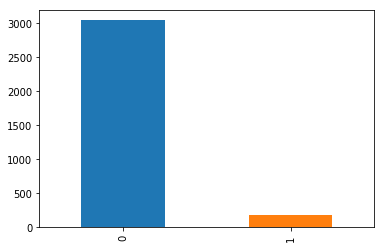

In [18]:
train_df[(train_df['MonthlyIncome']==0) | (train_df['MonthlyIncome'].isna()) ].SeriousDlqin2yrs.value_counts().plot.bar()

(array([223.,   1.,   2.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   5.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   4.,   0.,
          0.,   0.,   2.,   2.,   0.,   0.,   1.,   0.,   3.,   0.,   1.,
          1.,   0.,   2.,   1.,   0.,   0.,   1.,   8.,   1.,   0.,   4.,
          2.,   1.,   1.,   0.,   0.,   9.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490., 500.]),
 <a list of 50 Patch objects>)

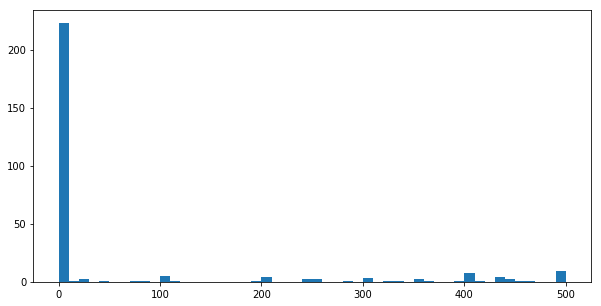

In [19]:
plt.figure(figsize=(10,5))
plt.hist(x = train_df.MonthlyIncome,range=(0,500),bins=50)

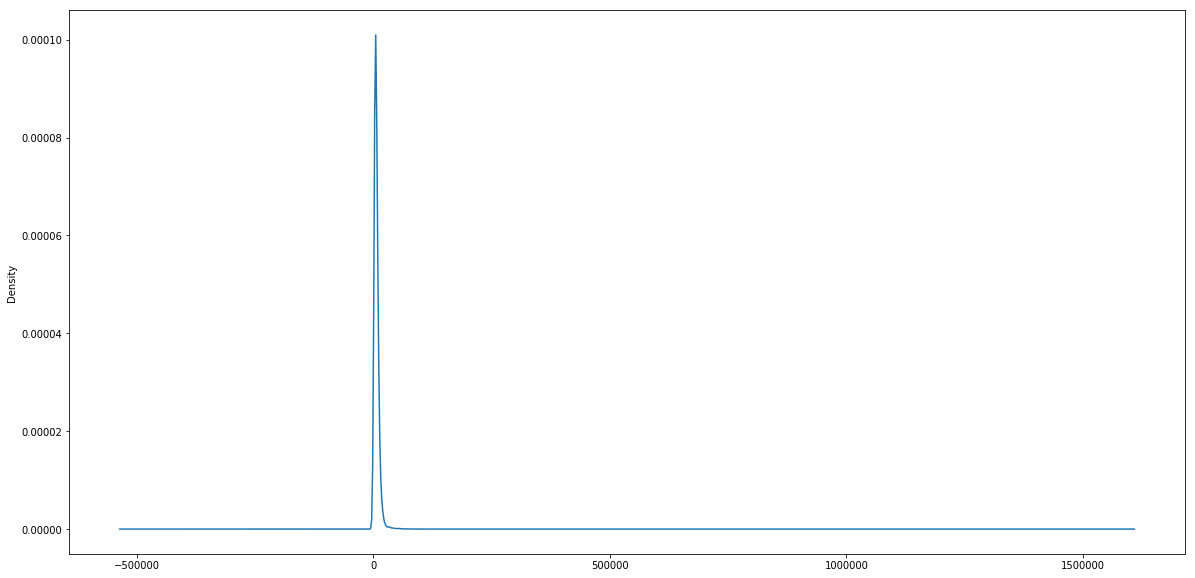

In [20]:
plt.figure(figsize=(20,10))
train_df.MonthlyIncome.plot.kde()

In [21]:
train_df.isna().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           3061
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       385
dtype: int64

In [79]:
train_df.drop(train_df[train_df['MonthlyIncome'].isna()==True].index,inplace=True)

In [80]:
train_df.drop(train_df[train_df['MonthlyIncome']==0].index,inplace=True)

In [81]:
train_df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [25]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
40217,0,0.010082,73,0,0.010245,2732.0,11,0,0,0,0.0
27187,0,0.471731,57,0,0.271027,10212.0,30,0,1,0,3.0
1253,0,0.037274,63,0,0.953488,1805.0,8,0,1,0,0.0
126102,0,0.430477,50,0,0.586699,2450.0,16,0,0,0,0.0
112284,0,0.029216,59,0,0.272549,4600.0,10,0,1,0,2.0


In [26]:
train_df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [82]:
train_df.NumberOfDependents = train_df.NumberOfDependents.astype('int64')

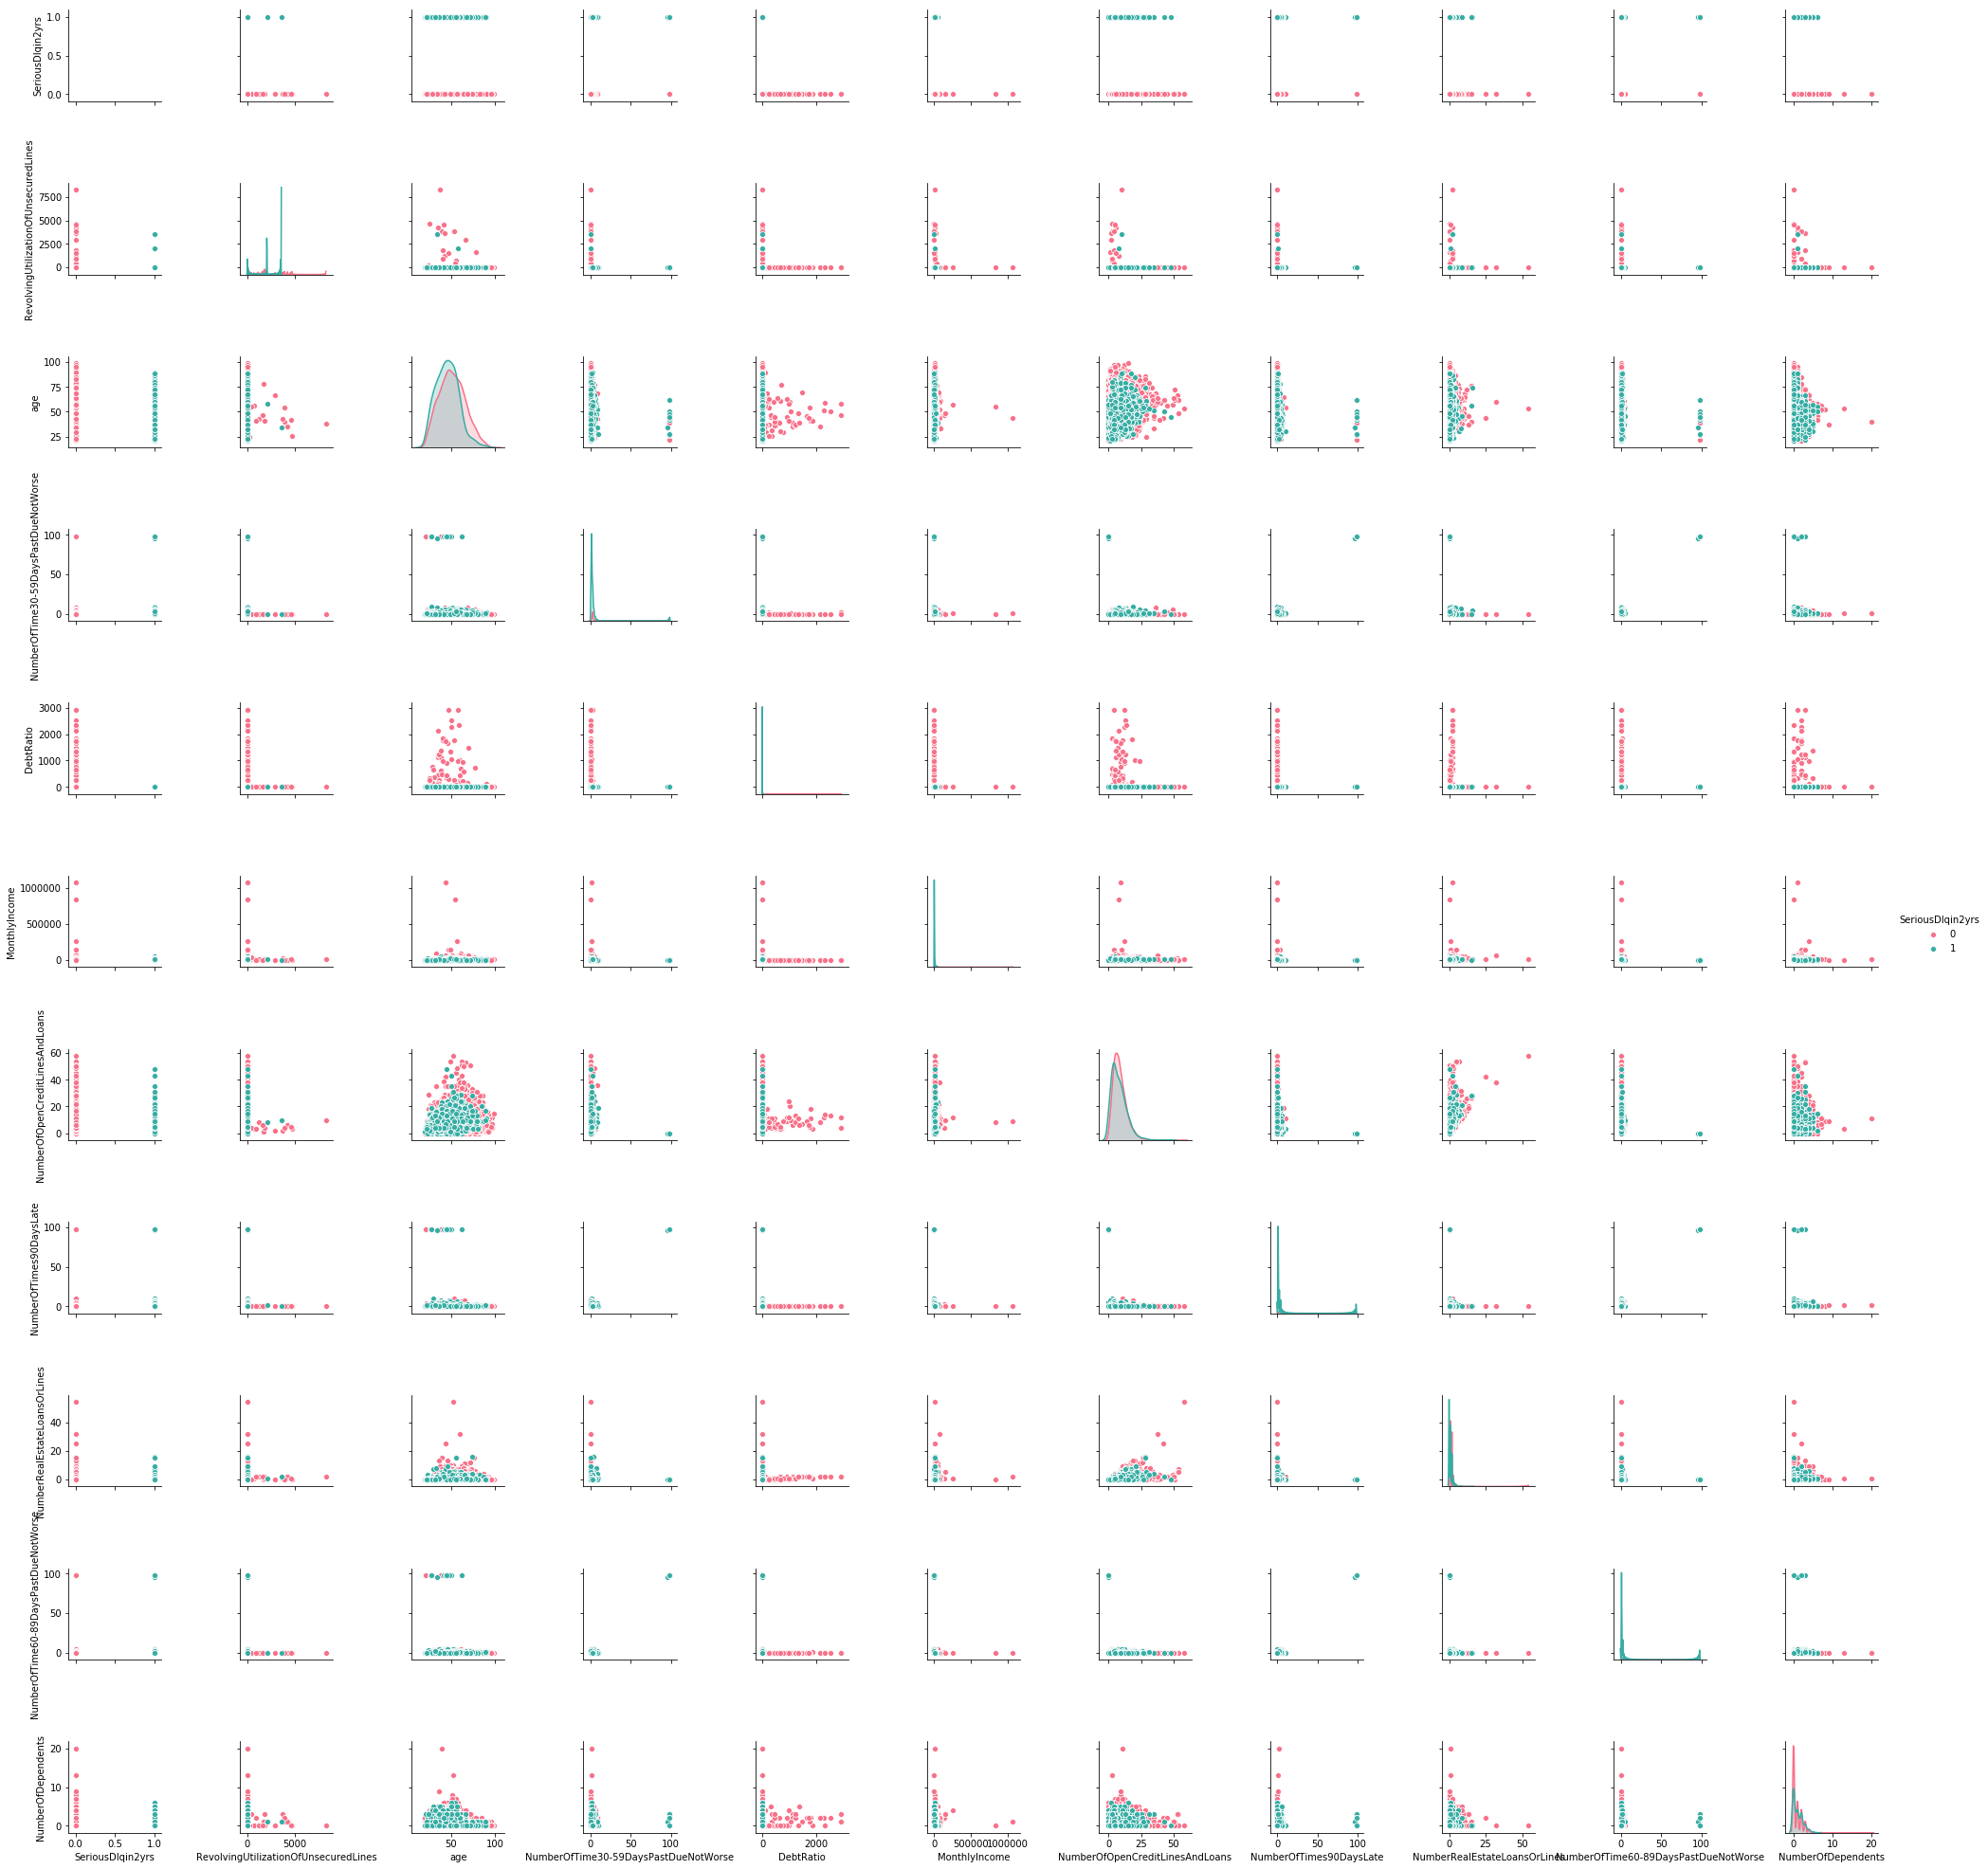

In [28]:
sns.pairplot(train_df,hue="SeriousDlqin2yrs", palette="husl")

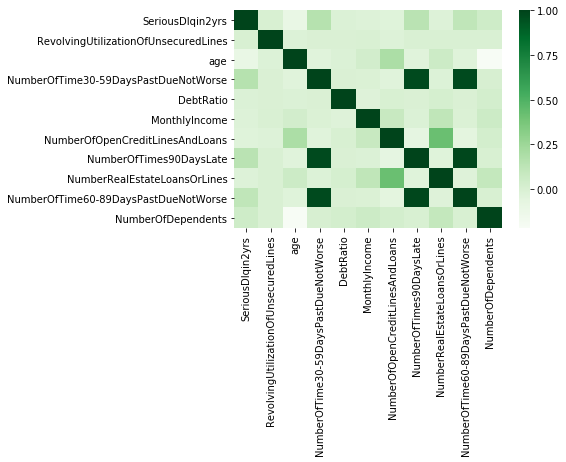

In [29]:
sns.heatmap(train_df.corr(),cmap = "Greens")


#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")


In [30]:
OutLiersBox(train_df,"NumberOfOpenCreditLinesAndLoans")

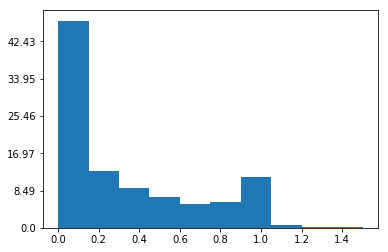

In [31]:
# this implies that the people who defaulted later than 30 days, most of them ran their accounts into bad debt as 
#they were termed as bad loans after 90+ days of default

# EDA
# 1. Revolving Utillization of unsecured lines
#plt.hist(x = train_df.RevolvingUtilizationOfUnsecuredLines,bins=10,range=(0,1))
#train_df[train_df.RevolvingUtilizationOfUnsecuredLines>0.4 & train_df.SeriousDlqin2yrs=1]
hist_perc(train_df.RevolvingUtilizationOfUnsecuredLines,10,0,1.5)



In [32]:
# Anamolies analysis in the data
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,11783.000000,11783.000000,11783.000000,11783.000000,11783.000000,1.178300e+04,11783.000000,11783.000000,11783.000000,11783.000000,11783.000000
mean,0.071119,4.739639,51.355597,0.358483,4.754743,6.764239e+03,8.771535,0.186285,1.055419,0.164389,0.861920
std,0.257035,133.963348,14.485255,3.194666,82.213402,1.381126e+04,5.377097,3.150420,1.285927,3.134546,1.167021
min,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033052,41.000000,0.000000,0.136065,3.500000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.175810,51.000000,0.000000,0.288996,5.416000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.575623,61.000000,0.000000,0.475766,8.300000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,8228.000000,99.000000,98.000000,2938.000000,1.072500e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [33]:
# The consolidated description confirms the presence of outliers in the data.
# Investigating further to detect outliers and visuallize them wrt different predictors.

One-Class SVM {-1: 2264, 1: 9519}


ValueError: Contour levels must be increasing

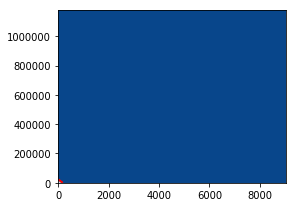

In [34]:
OutLierDetection(train_df,'RevolvingUtilizationOfUnsecuredLines','MonthlyIncome',outliers_fraction=.1)

In [ ]:
plotHist(train_df,'MonthlyIncome')

In [ ]:
train_df.head()

In [ ]:
plotBarCat(df,df_name[i],'Outcome')

In [ ]:
# Model Definition data cleaning

In [83]:
X_train = train_df.iloc[:,1:]
Y_train = train_df.iloc[:,0:1]

print(X_train.shape,Y_train.shape)
ScoreCard = pd.DataFrame()

(11783, 10) (11783, 1)


In [ ]:
ScoreCard.shape

In [84]:
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [85]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))

    
    return basedModels

In [86]:
def BasedLine2(X_train, Y_train,models,scoring_type):
    # Test options and evaluation metric
    num_folds = 10
    scoring = scoring_type

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [87]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [88]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)

LR: 0.903650 (0.004329)
LDA: 0.909036 (0.004709)
KNN: 0.895331 (0.001611)
CART: 0.892472 (0.006158)
NB: 0.907653 (0.004295)
SVM: 0.894548 (0.000505)
AB: 0.918795 (0.005986)
GBM: 0.916568 (0.007222)
RF: 0.911254 (0.005800)
ET: 0.913905 (0.006378)


In [ ]:
def ScoreDataFrame(names,results,score_name):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, score_name: scores})
    return scoreDataFrame

In [ ]:
basedLineF1Score = ScoreDataFrame(names,results,'baseline_f1_Score')
basedLineF1Score

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, Y_train,models,'accuracy')
PlotBoxR().PlotResult(names,results)

basedLineAccuracyScore = ScoreDataFrame(names,results,'baseline_accuracy')
basedLineAccuracyScore

In [ ]:
ScoreCard = pd.concat([basedLineAccuracyScore,
                       basedLineF1Score], axis=1)
ScoreCard

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))
    

    return pipelines 

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results,'standard_f1_score')


In [ ]:
ScoreCard = pd.concat([ScoreCard,
                           scaledScoreStandard], axis=1)
ScoreCard

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results,'minmax_f1_score')


In [ ]:
ScoreCard = pd.concat([ScoreCard,
                          scaledScoreMinMax], axis=1)
ScoreCard

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'+'CW'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression(class_weight='balanced'))])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART'+'CW', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier(class_weight='balanced'))])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM'+'CW' , Pipeline([('Scaler', scaler),('SVM' , SVC(class_weight='balanced'))])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'+'CW'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier(class_weight='balanced'))])  ))
    pipelines.append((nameOfScaler+'ET'+'CW'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier(class_weight='balanced'))])  ))
    

    return pipelines 

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)
scaledScoreStandardCW = ScoreDataFrame(names,results,'standard_f1_score')


In [ ]:
ScoreCard = pd.concat([ScoreCard,
                           scaledScoreStandardCW], axis=1)
ScoreCard

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)

scaledScoreMinMaxCW = ScoreDataFrame(names,results,'minmax_f1_score')


In [ ]:
ScoreCard = pd.concat([ScoreCard,
                          scaledScoreMinMaxCW], axis=1)
ScoreCard

###### Detect and Remove Outliers

In [ ]:
train_df = train_df.reset_index(drop=True)
df_t = train_df.copy()
df_t_name = df_t.columns
df_name = train_df.columns

In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    #feature_number = 1
    #df_out = df_t
    #nameOfFeature = df_name[feature_number]
    #drop = True
    
    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

In [ ]:
feature_number  = 1
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
feature_number  = 2
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
feature_number  = 3
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
train_df.describe()

In [ ]:
df_clean.drop(df_clean[(df_clean['NumberOfTime30-59DaysPastDueNotWorse']>50) &(df_clean.SeriousDlqin2yrs==0)].index,inplace=True)
df_clean.shape
#df_clean.drop(df_clean[df_clean['NumberOfTime30-59DaysPastDueNotWorse']>50],axis=1,inplace=True)

In [ ]:
feature_number  = 4
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
df_clean.describe()

In [ ]:
hist_perc(df_clean.DebtRatio,100,5,3000)

In [ ]:
df_clean.drop(df_clean[(df_clean.DebtRatio>5)&(df_clean.SeriousDlqin2yrs==0)].index,inplace=True)

In [ ]:
feature_number  = 5
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
hist_perc(df_clean.MonthlyIncome,1000,0,100000)

In [ ]:
df_clean.describe()

In [ ]:
df_clean.drop(df_clean[(df_clean.MonthlyIncome>30000)&(df_clean.SeriousDlqin2yrs==0)].index,inplace=True)
#df_clean[(df_clean.MonthlyIncome>30000)&(df_clean.SeriousDlqin2yrs==0)].SeriousDlqin2yrs.value_counts()

In [ ]:
df_clean.shape

In [ ]:
df_clean.describe()

In [ ]:
feature_number  = 6
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
hist_perc(df_clean.NumberOfOpenCreditLinesAndLoans,10,20,50)

In [ ]:
df_clean.drop(df_clean[(df_clean.NumberOfOpenCreditLinesAndLoans>20)&(df_clean.SeriousDlqin2yrs==0)].index,inplace=True)

In [ ]:
feature_number  = 7
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
# df_clean.drop(df_clean[(df_clean.NumberOfTimes90DaysLate>90)&(df_clean.SeriousDlqin2yrs==0)].index,inplace=True)
df_clean[(df_clean.NumberOfTimes90DaysLate>10)].SeriousDlqin2yrs.value_counts()

In [ ]:
feature_number  = 8
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
df_clean[(df_clean['NumberRealEstateLoansOrLines']>10)].SeriousDlqin2yrs.value_counts()

In [ ]:
feature_number  = 9
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
df_clean[(df_clean['NumberOfTime60-89DaysPastDueNotWorse']>10)].SeriousDlqin2yrs.value_counts()

In [ ]:
feature_number  = 10
print(df_name[feature_number])
OutLiersBox(df_t,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],False)
OutLiersBox(df_clean,df_name[feature_number])

In [ ]:
df_clean[(df_clean['NumberOfDependents']>6)].SeriousDlqin2yrs.value_counts()

In [ ]:
df_clean.drop(df_clean[(df_clean.NumberOfDependents>6)&(df_clean.SeriousDlqin2yrs==0)].index,inplace=True)

In [ ]:
df_clean.SeriousDlqin2yrs.value_counts()

In [ ]:
# New X_train Y Train with cleaned dataset

X_train = df_clean.iloc[:,1:]
Y_train = df_clean.iloc[:,0:1]

print(X_train.shape,Y_train.shape)


In [ ]:
ScoreCard

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)
scaledScoreStandardCW_Clean = ScoreDataFrame(names,results,'standard_f1_score_clean')
ScoreCard = pd.concat([ScoreCard,
                           scaledScoreStandardCW_Clean], axis=1)
ScoreCard

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)

scaledScoreMinMaxCW_clean = ScoreDataFrame(names,results,'minmax_f1_score_clean')
ScoreCard = pd.concat([ScoreCard,
                          scaledScoreMinMaxCW_clean], axis=1)
ScoreCard

###### FEATURE SELECTION

In [ ]:
def HeatMap(df,x=True):
        correlations = train_df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(train_df,x=True)


In [ ]:
# Feature Importance

clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train, Y_train)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train_df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
X_train = df_clean[['NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','RevolvingUtilizationOfUnsecuredLines','NumberOfOpenCreditLinesAndLoans','age']]

In [ ]:
print(X_train.shape,Y_train.shape)

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, Y_train,models,'f1_weighted')
PlotBoxR().PlotResult(names,results)
scaledScoreStandardCW_Clean_VI = ScoreDataFrame(names,results,'standard_f1_score_clean_vi')


In [ ]:
ScoreCard = pd.concat([ScoreCard,
                           scaledScoreStandardCW_Clean_VI], axis=1)
ScoreCard

In [ ]:
#ScoreCard = pd.concat([ScoreCard.iloc[0:11,0:15],ScoreCard.iloc[0:11,19:20]],axis=1)


In [ ]:
ScoreCard

### HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

In [ ]:

X_test = test_df.sample(frac=0.1)[['SeriousDlqin2yrs','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','RevolvingUtilizationOfUnsecuredLines','NumberOfOpenCreditLinesAndLoans','age']]
X_test.drop(test_df[['SeriousDlqin2yrs']],axis=1,inplace=True)
X_test = X_test.dropna()
#Y_test = X_test['SeriousDlqin2yrs']



In [ ]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

###### LOGISTIC REGRESSION

In [ ]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
LR_RandSearch = RandomSearch(X_train,Y_train,model,hyperparameters,scoring='f1_weighted')
LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_train)



In [ ]:
cp = classification_report(Y_train,Prediction_LR)
print(cp)




In [ ]:
hpt = [['hptuningLR',floatingDecimals(0.929252,4),0.91]]
hpt

###### KNN

In [ ]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [ ]:
KNN_GridSearch = GridSearch(X_train,Y_train,model_KNN,param_grid,scoring='f1_weighted')
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_train)


In [ ]:
cp = classification_report(Y_train,Prediction_KNN)
print(cp)


In [ ]:
hpt.append(['modehptuningKNN',floatingDecimals(0.926401,4),0.89])

In [ ]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [ ]:
SVC_GridSearch = GridSearch(X_train,Y_train,model_SVC,param_grid,scoring='f1_weighted')
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_train)

In [ ]:
C